In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML
display(HTML(""))
import lazy_pipeline as lpipe

from platform import python_version
import sklearn
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.9.13
1.4.4
1.0.2


In [2]:
df = pd.read_csv('audit_risk.csv')
df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [3]:
df1 = pd.read_csv('trial.csv')
df1

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [4]:
df.drop(columns=['LOCATION_ID', 'TOTAL', 'Detection_Risk'], inplace=True) # we delete them as they have no weight in the analysis
df

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.3156,0
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.3136,0
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.2912,0
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.2880,0


In [5]:
# Fill missing values # Average it is judged correct to replace missing values ​​with the average of the values.
print(df['Money_Value'].mean())


print(df['Money_Value'].value_counts())

14.13763096774195
0.00     332
0.04      11
0.02       9
0.06       8
0.05       7
        ... 
22.10      1
8.38       1
4.24       1
34.32      1
2.40       1
Name: Money_Value, Length: 328, dtype: int64


In [6]:
df.isnull().sum()

Sector_score     0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      1
Score_MV         0
Risk_D           0
District_Loss    0
PROB             0
RiSk_E           0
History          0
Prob             0
Risk_F           0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
dtype: int64

In [7]:
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].mean())

In [8]:
y_name = 'Risk'


In [10]:
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(776, 3377)


,Sector_score: 1.85,Sector_score: 1.99,Sector_score: 2.34,Sector_score: 2.36,Sector_score: 2.37,Sector_score: 2.72,Sector_score: 3.41,Sector_score: 3.89,Sector_score: 15.56,Sector_score: 17.68,...,Audit_Risk: 68.7432,Audit_Risk: 82.5248,Audit_Risk: 115.5016,Audit_Risk: 116.7376,Audit_Risk: 124.5676,Audit_Risk: 134.7624,Audit_Risk: 149.8176,Audit_Risk: 204.7808,Audit_Risk: 222.0096,Audit_Risk: 961.5144
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index] 

In [12]:

X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'Audit_Risk: 0.4124',
 'CONTROL_RISK: 0.4',
 'District_Loss: 2',
 'History: 0',
 'Inherent_Risk: 2.062',
 'Money_Value: 0.43',
 'PARA_A: 0.6',
 'PARA_B: 1.14',
 'PROB: 0.2',
 'Prob: 0.2',
 'RiSk_E: 0.4',
 'Risk_A: 0.12',
 'Risk_B: 0.456',
 'Risk_C: 1.0',
 'Risk_D: 0.086',
 'Risk_F: 0.0',
 'Score: 2.6',
 'Score_A: 0.2',
 'Score_B.1: 0.2',
 'Score_B: 0.4',
 'Score_MV: 0.2',
 'Sector_score: 1.85',
 'numbers: 5.0'}

In [13]:
y = y.values.tolist()

In [14]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(77, 699)

In [15]:
len(X_bin)

776

In [16]:
y_test = y[n_train:]

In [17]:
%%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 776/776 [00:32<00:00, 21.69it/s] 

Wall time: 32.2 s


In [18]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 776/776 [00:00<00:00, 745.58it/s]

Wall time: 949 ms


In [19]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

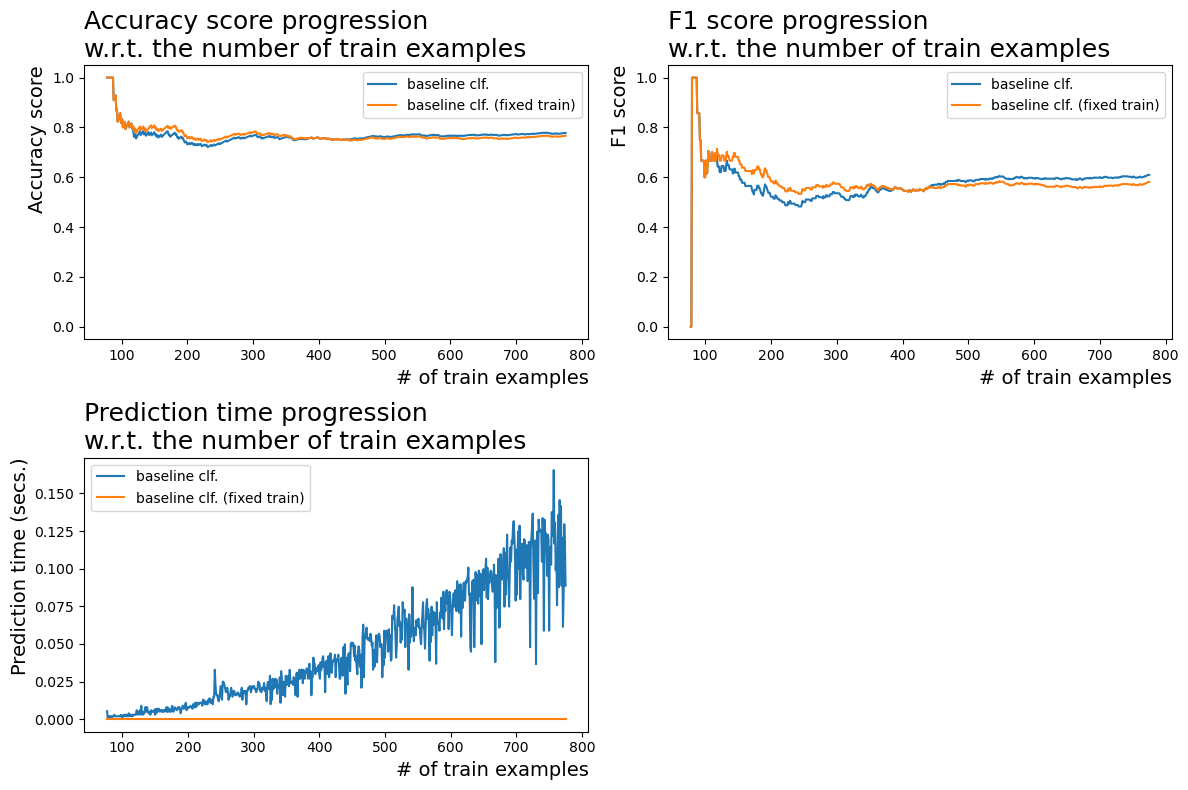

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [21]:
sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100

76.83435064323602

In [22]:
sum(score_vals['f1_score'])/len(score_vals['f1_score'])*100

57.78551938264403

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=4, stratify=y)
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
# XGBoost

'''from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(x_train, y_train'''

'from xgboost import XGBClassifier\nmodel_XGB = XGBClassifier()\nmodel_XGB.fit(x_train, y_train'

In [25]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(x_train, y_train)

SVC()

In [26]:
y_pred_RF = model_RF.predict(x_test)
#y_pred_XGB = model_XGB.predict(X_val)
y_pred_SVC = model_SVC.predict(x_test)

In [27]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score,precision_score, recall_score

In [28]:
pd.DataFrame({'random forest accuracy':accuracy_score(y_pred_RF, y_test),
             'random forest precision':precision_score(y_pred_RF, y_test),
             'random forest recall':recall_score(y_pred_RF, y_test),
             'random forestf1_score':precision_score(y_pred_RF, y_test),
             'random forest roc_auc_score':roc_auc_score(y_pred_RF, y_test)},index=['random forest'])

,random forest accuracy,random forest precision,random forest recall,random forestf1_score,random forest roc_auc_score
random forest,0.917024,0.810909,0.973799,0.810909,0.93158
